## Predict Podcast Listening Time

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [48]:
train.describe()

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Has_Guest
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,64.427546,4.648788,59.859901,2.962776,1.522868,42.065664,1.348853,0.997969,45.437406,0.805293
std,30.996996,2.963073,22.873098,1.997399,1.119361,32.858857,1.151131,0.815440,27.138306,0.395975
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.420000,2.000000,39.410000,1.000000,1.000000,7.850000,0.000000,0.000000,23.178350,1.000000
50%,63.840000,5.000000,60.050000,3.000000,1.000000,42.200000,1.000000,1.000000,43.379460,1.000000
75%,90.310000,7.000000,79.530000,5.000000,3.000000,71.040000,2.000000,2.000000,64.811580,1.000000
max,325.240000,9.000000,119.460000,6.000000,3.000000,119.910000,103.910000,2.000000,119.970000,1.000000


In [5]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [6]:
test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [7]:
median_length = train['Episode_Length_minutes'].median()
train['Episode_Length_minutes'].fillna(median_length, inplace=True)
train['Episode_Length_minutes'] = train.groupby('Genre')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.median()))

median = test['Episode_Length_minutes'].median()
test['Episode_Length_minutes'].fillna(median, inplace=True)
test['Episode_Length_minutes'] = test.groupby('Genre')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.median()))


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3588871706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Episode_Length_minutes'].fillna(median_length, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3588871706.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Observation:
Different genres likely have different episode length patterns. Using the overall median would distort the true distribution within each genre. This group-level imputation ensures each genre is treated equitably and it helps reatain relationships between features.

In [8]:
train['Has_Guest'] = train['Guest_Popularity_percentage'].notnull().astype(int)
train['Guest_Popularity_percentage'].fillna(0, inplace=True)
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].median())

test['Has_Guest'] = test['Guest_Popularity_percentage'].notnull().astype(int)
test['Guest_Popularity_percentage'].fillna(0, inplace=True)
test['Guest_Popularity_percentage'] = test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].median())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3065452659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Guest_Popularity_percentage'].fillna(0, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3065452659.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Observation:

- 'Has_Guest' indicates whether a value exists in the Guest_Popularity_percentage.
- 0 means null NaN, 1 means there is a value.

- I fill all missing values in Guest_Popularity_percentage with 0, considering missing value could imply the absence of a value, example, a guest with 0% popularity or a guest that hasn't been rated yet.

- Then, any remaining missing values are replaced to median. This helps to model the data more accurately without assuming that missing values are completely random or extreme.

In [9]:
train['Number_of_Ads'].unique()

array([  0.  ,   2.  ,   3.  ,   1.  ,  53.37,    nan, 103.91, 103.  ,
        53.42, 103.75,  12.  , 103.25, 103.88])

In [10]:
train['Number_of_Ads'].fillna(train['Number_of_Ads'].mode()[0], inplace=True)
test['Number_of_Ads'].fillna(test['Number_of_Ads'].mode()[0], inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3232574779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Number_of_Ads'].fillna(train['Number_of_Ads'].mode()[0], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5828\3232574779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

Observation:

- Although Number_of_Ads values are discrete categories, the data has a few unique values repeated often just like categorical data. 

- Using mean can result in non-integer values like 1.6 which may not make sense for count data unless i round them.

In [11]:
train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
Has_Guest                      0
dtype: int64

In [12]:
test.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Has_Guest                      0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

In [15]:
train.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
Has_Guest                        int32
dtype: object

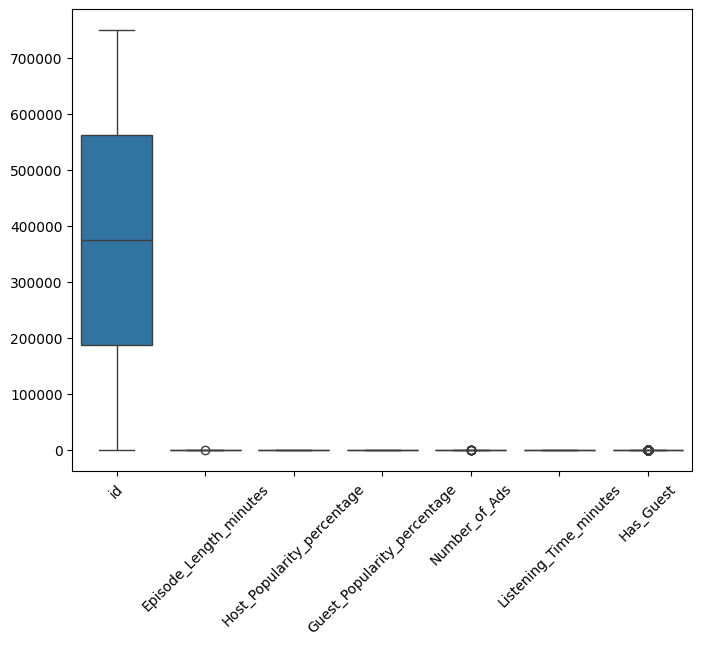

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train)
plt.xticks(rotation=45)
plt.show()

In [17]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = train.select_dtypes(include=['number']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(train, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in id: 0
Outliers in Episode_Length_minutes: 1
Outliers in Host_Popularity_percentage: 0
Outliers in Guest_Popularity_percentage: 0
Outliers in Number_of_Ads: 9
Outliers in Listening_Time_minutes: 0
Outliers in Has_Guest: 146030


In [18]:
train['Episode_Length_minutes'].unique()

array([ 63.84      , 119.8       ,  73.9       , ..., 112.002     ,
         6.71292308,  62.16729385])

In [19]:
train['Number_of_Ads'].unique()

array([  0.  ,   2.  ,   3.  ,   1.  ,  53.37, 103.91, 103.  ,  53.42,
       103.75,  12.  , 103.25, 103.88])

In [20]:
train['Has_Guest'].unique()

array([0, 1])

In [21]:
train['Has_Guest'].value_counts()


Has_Guest
1    603970
0    146030
Name: count, dtype: int64

- Episode_Length_minutes/Number_of_Ads: The extreme values are only a few and don't disrupt the general distribution, we might keep them.

- Has_Guest: It is a binary column, consisting 0 and 1. There is no non-binary values found so we leave it as is.

### EDA

Listening Time and Number of Ads

<Axes: xlabel='Number_of_Ads', ylabel='Listening_Time_minutes'>

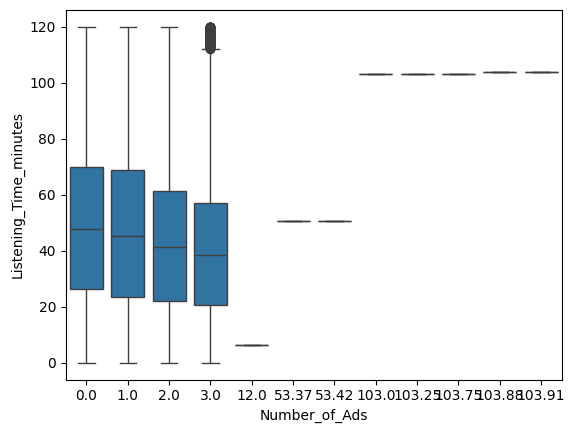

In [39]:
sns.boxplot(x='Number_of_Ads', y='Listening_Time_minutes', data=train)


Histogram of Listening Time

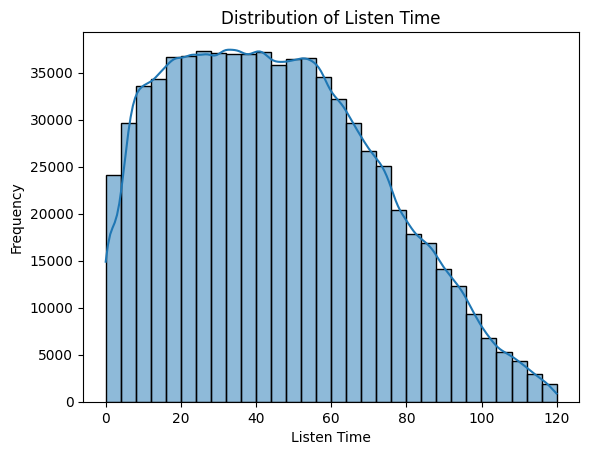

In [38]:
sns.histplot(train['Listening_Time_minutes'], kde=True, bins=30)
plt.title('Distribution of Listen Time')
plt.xlabel('Listen Time')
plt.ylabel('Frequency')
plt.show()

Listening Time by Has_Guest

<Axes: xlabel='Has_Guest', ylabel='Listening_Time_minutes'>

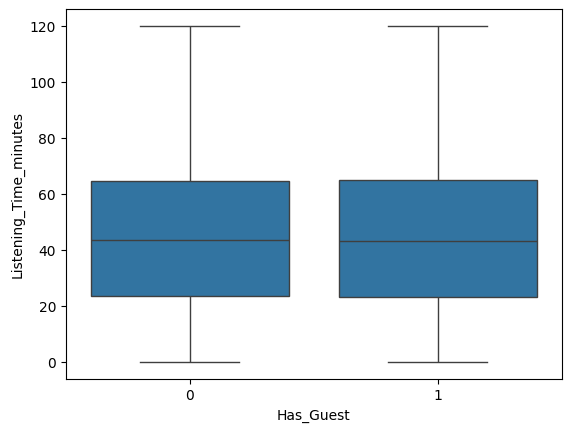

In [40]:
sns.boxplot(x='Has_Guest', y='Listening_Time_minutes', data=train)


Episode Length and Listening Time

<Axes: xlabel='Episode_Length_minutes', ylabel='Listening_Time_minutes'>

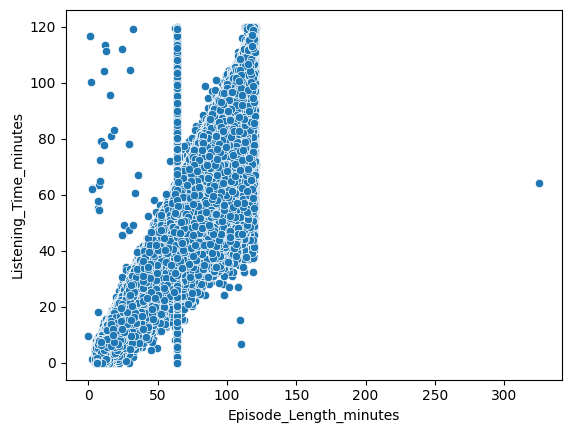

In [41]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train)


Heatmap of Correlation

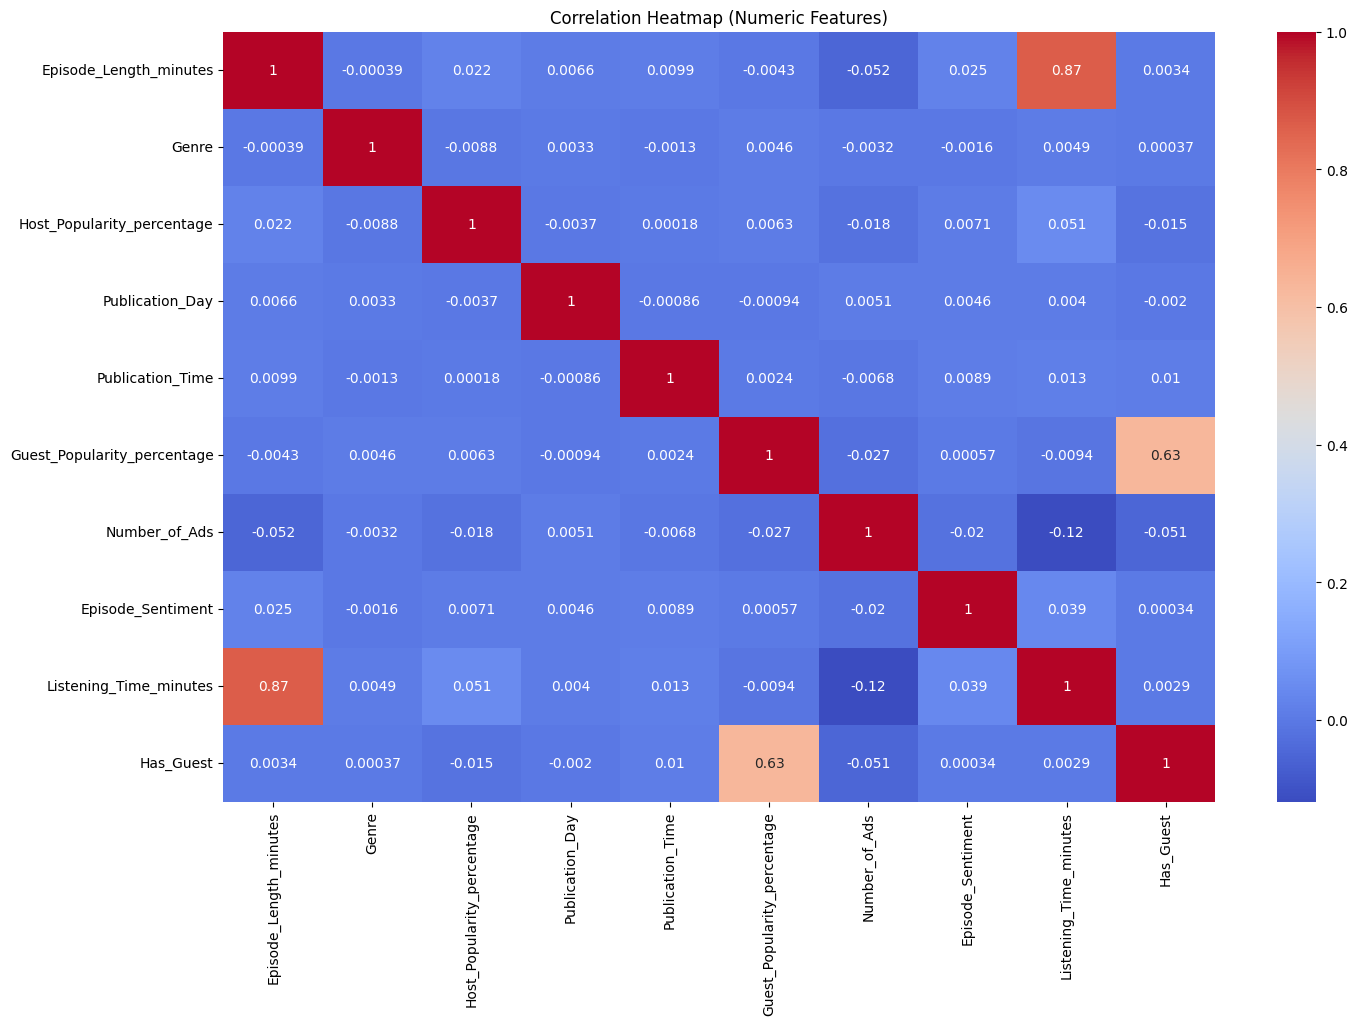

In [47]:
numerical_cols = train.select_dtypes(include='number')

plt.figure(figsize=(16,10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Frequency by Time Ranges

<Axes: xlabel='Time_Bin', ylabel='count'>

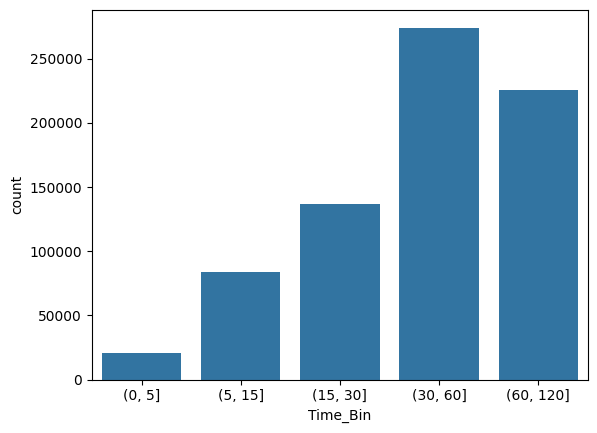

In [43]:
train['Time_Bin'] = pd.cut(train['Listening_Time_minutes'], bins=[0, 5, 15, 30, 60, 120])
sns.countplot(x='Time_Bin', data=train)

### Feature Engineer

In [23]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder

test_ids = test['id'].copy()
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

numerical_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

def encode_data(data, categorical_cols):
    
    for col in categorical_cols:
        # Count unique values in the column
        num_unique = data[col].nunique()
        
        if num_unique <= 10:  
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            print(f"Ordinal Encoding applied to {col} with {num_unique} unique values.")
        else:  # Apply One-Hot Encoding if more than 10 unique values
            data = pd.get_dummies(data, columns=[col], drop_first=True)
            print(f"One-Hot Encoding applied to {col} with {num_unique} unique values.")
    
    return data

train = encode_data(train, categorical_cols)
test = encode_data(test, categorical_cols)


One-Hot Encoding applied to Podcast_Name with 48 unique values.
One-Hot Encoding applied to Episode_Title with 100 unique values.
Ordinal Encoding applied to Genre with 10 unique values.
Ordinal Encoding applied to Publication_Day with 7 unique values.
Ordinal Encoding applied to Publication_Time with 4 unique values.
Ordinal Encoding applied to Episode_Sentiment with 3 unique values.
One-Hot Encoding applied to Podcast_Name with 48 unique values.
One-Hot Encoding applied to Episode_Title with 100 unique values.
Ordinal Encoding applied to Genre with 10 unique values.
Ordinal Encoding applied to Publication_Day with 7 unique values.
Ordinal Encoding applied to Publication_Time with 4 unique values.
Ordinal Encoding applied to Episode_Sentiment with 3 unique values.


Observation: I performed one-hot encoding on low-cardinality columns to avoid high dimensionality, especially in tree-based models. Using LabelEncoder for higher-cardinality columns can prevents explosion of features.

### Random Forest Regressor

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

numerical_cols = [col for col in numerical_cols if col != 'Listening_Time_minutes']

scaler = RobustScaler()

X = train.drop('Listening_Time_minutes', axis=1)  
y = train['Listening_Time_minutes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [25]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 169.2130003674891
RMSE: 13.008189742138953
MAE: 9.471120900076611
R² Score: 0.7703896971669593

==== Test Metrics ====
MSE: 171.81382053483833
RMSE: 13.107777101203633
MAE: 9.540034074717166
R² Score: 0.7663631193661065


Observation:

- MSE (Mean Squared Error): Training MSE is slightly lower than Test MSE, indicating the model is generalizing well and not overfitting. But the values are a bit high overally so there is a room for improvement.
  
- RMSE (Root Mean Squared Error): It is in the same unit as the target variable. A lower RMSE means a better fit and both RMSE are very close, suggesting the model is performing consistently.

- MAE (Mean Absolute Error): The values are similar across both training and testing sets, indicating the model has a similar level of error in its predictions.

- R2 score: They both are 77%, so it is consistent and decent generalization.

- The errros could still be reduced.

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 13.1361


Observation: Train RMSE ≈ CV RMSE ≈ Test RMSE, showing good generalization

In [27]:
best_rf = RandomForestRegressor(n_estimators=50, max_depth=15, max_features='sqrt',n_jobs=-1, random_state=42)

best_rf.fit(X_train, y_train)

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [28]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 287.6415984808378
RMSE: 16.959999955213377
MAE: 13.341328988820445
R² Score: 0.6096903051708171

==== Test Metrics ====
MSE: 292.4683068874426
RMSE: 17.101704794769514
MAE: 13.44951855133055
R² Score: 0.6022940256333864


Observation:

- Lower errors (RMSE and MAE) on both train and test sets.

- Higher R2, it explains more variance in the data.

- It generalizes better without clear signs of overfitting.

- The best-performing and most reliable model so far.

In [29]:
cv_scores = cross_val_score(best_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 17.0780


Observation: CV RMSE is lower than the previous one. It suggests the model has better generalization performance and isn't overfitting.

In [30]:
best_rf_2 = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42)

best_rf_2.fit(X_train, y_train)

y_train_pred = best_rf_2.predict(X_train)
y_test_pred = best_rf_2.predict(X_test)

In [31]:
# training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("==== Train Metrics ====")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R² Score:", r2_train)

print("\n==== Test Metrics ====")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R² Score:", r2_test)

==== Train Metrics ====
MSE: 121.27312468176811
RMSE: 11.01240776042043
MAE: 7.860103350345295
R² Score: 0.8354407827813692

==== Test Metrics ====
MSE: 165.82119700806638
RMSE: 12.877157955390093
MAE: 9.303424154894094
R² Score: 0.7745120439593082


In [32]:
cv_scores = cross_val_score(best_rf_2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"CV RMSE: {cv_rmse:.4f}")

CV RMSE: 12.9352


Observation: It aligns well with the Test RMSE, showing the model performs consistently across different data splits.

In [ ]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV

# param_dist = {
#     'n_estimators':[100, 300, 500],  
#     'max_depth': [10, 20, None],  
#     'min_samples_split': [2, 10], 
#     'min_samples_leaf': [1, 4],
#     'max_features': ['sqrt', 'log2']  
# }

# halving_search = HalvingRandomSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     factor=2,
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
# )
# halving_search.fit(X_train, y_train)

# print("Best parameters found: ", halving_search.best_params_)

# best_rf = halving_search.best_estimator_

# Observation: I'm choosing HalvingRandomSearchCV for tuning parameters 
# becuase it allocates fewer resources/trees/samples to many candidates at first. 
# Then it keeps only the best-performing cadidates, gradually increasing resources for them. 
# It saves time while still finding good parameters.

# I'm tuning over many hyperparameter combinations so grid and random search 
# can waste time testing bad ones at full cost. On the other hand Halving searches 
# prune weak combinations early, avoiding that waste. It is more efficient 
# to get a result close to optimal in a reasonable amount of time.

In [ ]:
test[numerical_cols] = scaler.transform(test[numerical_cols])
predictions = best_rf_2.predict(test)

submission = pd.DataFrame({
    'id': test_ids,
    'Listening_Time_minutes': predictions
})

# Save to CSV
submission.to_csv("submission_bestrf.csv", index=False)

Conclusion: The best_rf_2 model performs better across all major metrics. It has lower error (RMSE, MAE) and higher R2 for both training and test sets. It also generaliezes better, shown by improved cross-validation (CV RMSE).

- The newest model is the clear winner and should be used for prediction and submission.